In [2]:
import pandas as pd
path_to_file = "C:\\Users\\USUARIO\\Desktop\\Python\\Repo\\customers_clustering\\inputs\\customers.xlsx"
df = pd.read_excel(path_to_file)
print(df.head(), df.columns, df.shape)

   ID_customer  avg_ticket  total_amount  ticket_std_dev  purchases  \
0            1     19.3035       38.6070           2.268          2   
1            2     28.3305       84.9915           2.997          3   
2            3     41.1400      329.1200          13.887          8   
3            4     29.5800      650.7600           8.244         22   
4            5     34.4675      172.3375          17.595          5   

   frequency  inactive_days  web_purchases  app_purchases  mon_thur_purchases  \
0         49            100              0              2                   0   
1         56             22              0              3                   0   
2         28             62              0              8                   0   
3         16             21              0             22                   5   
4         33             14              0              5                   1   

   frid_sund_purchases  early_purchases  lunch_purchases  afterlunch_purchase  \
0    

In [4]:
df.describe()

,ID_customer,avg_ticket,total_amount,ticket_std_dev,purchases,frequency,inactive_days,web_purchases,app_purchases,mon_thur_purchases,frid_sund_purchases,early_purchases,lunch_purchases,afterlunch_purchase,evening_purchase,weekly_lunch,weekend_big_ticket
count,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000
mean,11447.000000,41.183243,228.622713,14.016631,5.898310,47.309483,97.598567,0.317826,5.580483,2.101428,3.796881,1.105884,2.198445,0.660377,1.933604,1.264404,1.407111
std,6608.784192,20.003630,267.789389,14.414394,6.807484,52.775813,90.217636,1.375878,6.845647,3.452370,4.506463,1.480040,3.100897,1.379919,3.273199,2.811702,2.374987
min,1.000000,14.696500,29.393000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5724.000000,26.545500,89.250000,4.590000,2.000000,15.000000,20.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,11447.000000,38.386000,144.500000,11.079000,4.000000,30.000000,71.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,17170.000000,50.422000,262.565000,18.567000,6.000000,58.000000,157.000000,0.000000,6.000000,2.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000
max,22893.000000,322.133000,9284.261000,208.989000,130.000000,466.000000,425.000000,61.000000,130.000000,105.000000,84.000000,61.000000,80.000000,86.000000,75.000000,122.000000,42.000000


C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


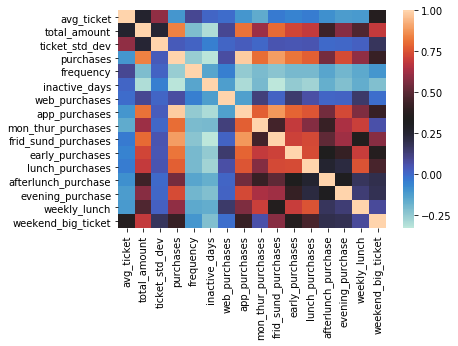

In [11]:
#Check correlations
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df.drop("ID_customer", axis = 1).corr()
corr_heatmap=sns.heatmap(df_corr,cmap='icefire')
path_corr_matrix = "C:\\Users\\USUARIO\\Desktop\\Python\\Repo\\customers_clustering\\outputs\\corr_matrix.png"
corr_heatmap.figure.savefig(path_corr_matrix, bbox_inches="tight")
corr_heatmap.figure.show()

In [12]:
#Make columns proportions
#Intra proportions
intra_prop_columns = ['avg_ticket', 'total_amount', 'ticket_std_dev', 'purchases', 'frequency', 'inactive_days']

for column in intra_prop_columns:
    max_val = df[column].max()
    df["prop_"+column] = df[column] / max_val

#Inter proportions
inter_prop_columns = [['web_purchases','app_purchases'], ['mon_thur_purchases', 'frid_sund_purchases'],
       ['early_purchases', 'lunch_purchases', 'afterlunch_purchase','evening_purchase'], ['weekly_lunch'], ['weekend_big_ticket']]

for columns in inter_prop_columns:
    if len(columns) == 1:
        column = columns[0]
        df["prop_"+column] = (df[column] / df["purchases"]).fillna(0)
    else:
        for column in columns:
            df["prop_"+column] = (df[column] / df[columns].sum(axis=1)).fillna(0)

print(df.head(), df.columns, df.shape)


   ID_customer  avg_ticket  total_amount  ticket_std_dev  purchases  \
0            1     19.3035       38.6070           2.268          2   
1            2     28.3305       84.9915           2.997          3   
2            3     41.1400      329.1200          13.887          8   
3            4     29.5800      650.7600           8.244         22   
4            5     34.4675      172.3375          17.595          5   

   frequency  inactive_days  web_purchases  app_purchases  mon_thur_purchases  \
0         49            100              0              2                   0   
1         56             22              0              3                   0   
2         28             62              0              8                   0   
3         16             21              0             22                   5   
4         33             14              0              5                   1   

   ...  prop_web_purchases  prop_app_purchases  prop_mon_thur_purchases  \
0  ...     

In [13]:
df.describe()

,ID_customer,avg_ticket,total_amount,ticket_std_dev,purchases,frequency,inactive_days,web_purchases,app_purchases,mon_thur_purchases,...,prop_web_purchases,prop_app_purchases,prop_mon_thur_purchases,prop_frid_sund_purchases,prop_early_purchases,prop_lunch_purchases,prop_afterlunch_purchase,prop_evening_purchase,prop_weekly_lunch,prop_weekend_big_ticket
count,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,...,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000,22893.000000
mean,11447.000000,41.183243,228.622713,14.016631,5.898310,47.309483,97.598567,0.317826,5.580483,2.101428,...,0.080628,0.919372,0.351343,0.648657,0.199007,0.367113,0.113361,0.320519,0.201631,0.268721
std,6608.784192,20.003630,267.789389,14.414394,6.807484,52.775813,90.217636,1.375878,6.845647,3.452370,...,0.250031,0.250031,0.310351,0.310351,0.180107,0.239206,0.187100,0.305918,0.279123,0.326234
min,1.000000,14.696500,29.393000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5724.000000,26.545500,89.250000,4.590000,2.000000,15.000000,20.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.500000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
50%,11447.000000,38.386000,144.500000,11.079000,4.000000,30.000000,71.000000,0.000000,3.000000,1.000000,...,0.000000,1.000000,0.333333,0.666667,0.200000,0.400000,0.000000,0.312500,0.000000,0.111111
75%,17170.000000,50.422000,262.565000,18.567000,6.000000,58.000000,157.000000,0.000000,6.000000,2.000000,...,0.000000,1.000000,0.500000,1.000000,0.333333,0.500000,0.200000,0.500000,0.333333,0.500000
max,22893.000000,322.133000,9284.261000,208.989000,130.000000,466.000000,425.000000,61.000000,130.000000,105.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000,1.000000


C:\Users\USUARIO\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


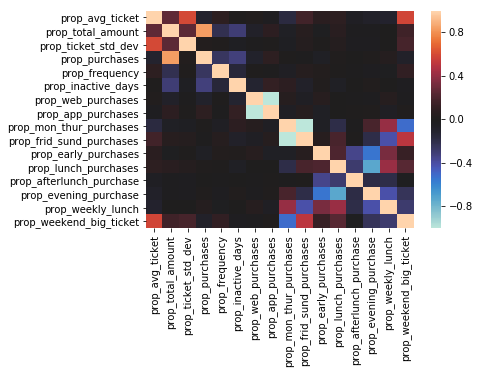

In [14]:
#Check correlations for prop
import seaborn as sns
import matplotlib.pyplot as plt
prop_columns = [col for col in df.columns if ('prop_' in col)]
df_corr = df[prop_columns].corr()
corr_heatmap_prop = sns.heatmap(df_corr,cmap='icefire')
path_corr_matrix_prop = "C:\\Users\\USUARIO\\Desktop\\Python\\Repo\\customers_clustering\\outputs\\corr_matrix_prop.png"
corr_heatmap_prop.figure.savefig(path_corr_matrix_prop, bbox_inches="tight")
corr_heatmap_prop.figure.show()

In [15]:
path_for_props = "C:\\Users\\USUARIO\\Desktop\\Python\\Repo\\customers_clustering\\outputs\\customers_with_props.xlsx"
df.to_excel(path_for_props)

C:\Users\USUARIO\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\USUARIO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\USUARIO\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


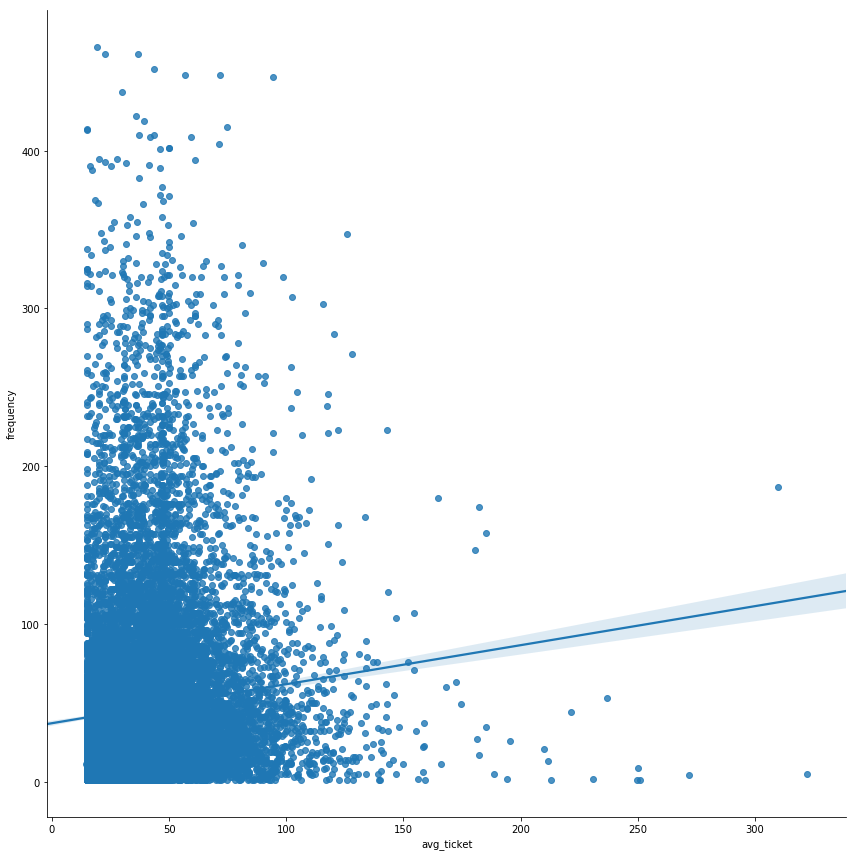

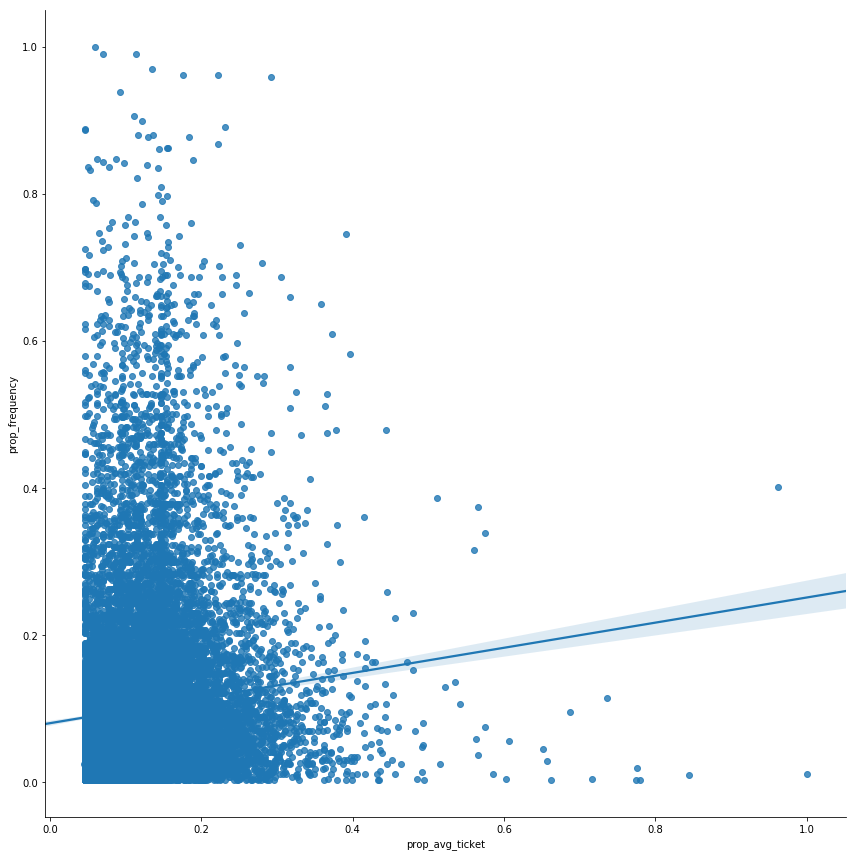

In [17]:
#Two vars visualizations
sns.lmplot(x='avg_ticket', y='frequency', 
           data=df, size=12)
sns.lmplot(x='prop_avg_ticket', y='prop_frequency', 
           data=df, size=12)